# Gemlam weirdness

I was messing around with some of the early HRDPS record (gemlam) and noticed some inconsistencies in the gridding. I've included a few example dates below.

***

In [66]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import os
from datetime import datetime, timedelta
from contextlib import ExitStack

from salishsea_tools import grid_tools

In [85]:
plt.rcParams['font.size'] = 12

***

In [69]:
def make_path(date, path='/results/forcing/atmospheric/GEM2.5'):
    """small change on 2011sep22, big change between datasets
    """

    if date > datetime(2014, 11, 18):
        pathout = os.path.join(path, 'operational', 'ops_' + date.strftime('y%Ym%md%d') + '.nc')
    else:
        pathout = os.path.join(path, 'gemlam', 'gemlam_' + date.strftime('y%Ym%md%d') + '.nc')

    return pathout

***

Build HRDPS mask using `find_closest_model_point` and the ERDDAP geolocation data.

In [3]:
# Build HRDPS mask
mask_NEMO = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSn3DMeshMaskV17-02')
grid_NEMO = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSnBathymetryV17-02')
grid_HRPDS = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaAtmosphereGridV1')
mask_HRDPS = grid_tools.build_GEM_mask(grid_HRPDS, grid_NEMO, mask_NEMO.tmask[0, 0, ...])

100%|██████████| 68096/68096 [14:19<00:00, 79.20it/s] 


***

V wind velocity plotted for select dates

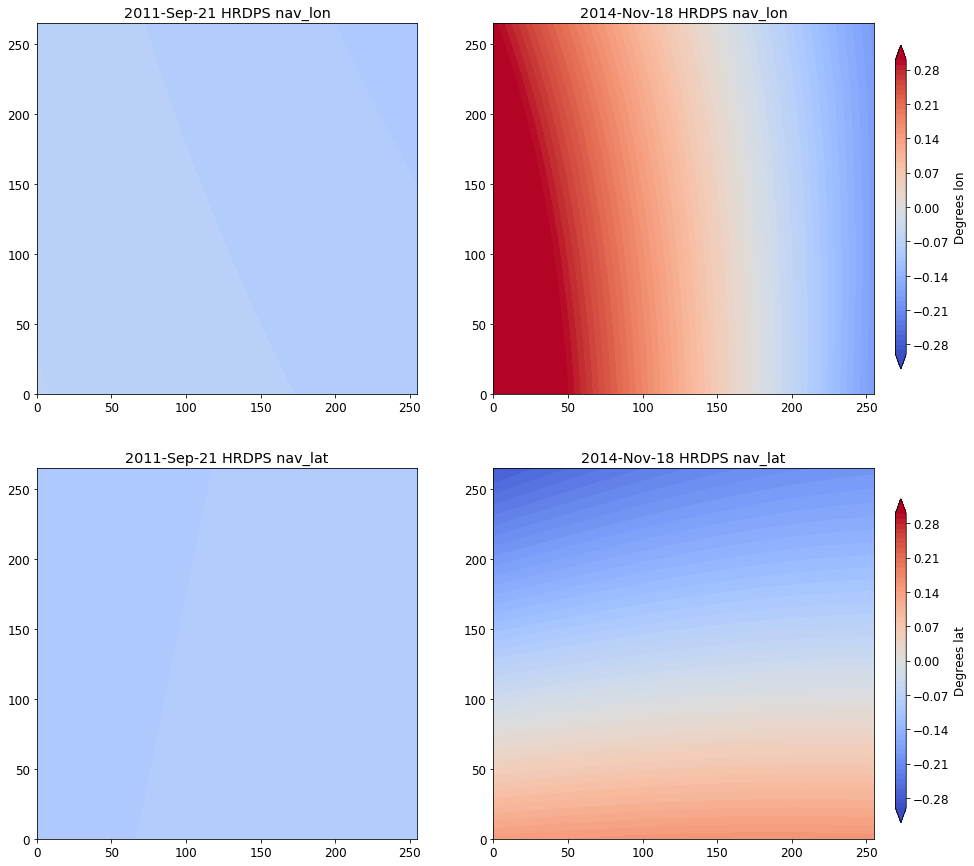

In [88]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

for row, coord, ypos in zip(axs, ['lon', 'lat'], [0.56, 0.14]):

    for ax, date in zip(row, [datetime(2011, 9, 21), datetime(2014, 11, 18)]):
        with ExitStack() as stack:
            ds = [xr.open_dataset(make_path(d)) for d in (date, date + timedelta(days=1))]
            c = ax.contourf(ds[1]['nav_'+coord]-ds[0]['nav_'+coord], levels=np.arange(-0.3, 0.301, 0.01), cmap='coolwarm', extend='both')
            ax.set_title(date.strftime('%Y-%b-%d HRDPS nav_') + coord)
            
    cax = fig.add_axes([0.92, ypos, 0.01, 0.3])
    fig.colorbar(c, cax=cax, label='Degrees ' + coord)